## 2) Feature decomposition
- 변수축소
- LCY_COMPARE_WITH
- PJH_COMPARE_WITH

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


### 변수축소

In [33]:
player_df = pd.read_csv("./merged_player.csv", index_col=0)

# drop columns
drop_column_list = ['Unnamed: 0.1', 'flag', 'full_time', 'half_time', 'league', 'mins', 'motm', 'name', 'player_number', 'position', 'ps_y', 'rating', 'team_name', 'labeled_league']
player_df0 = player_df.drop(drop_column_list, axis=1)

In [34]:
player_df0.columns

Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
       'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp', 'longb', 'off',
       'offsides', 'owng', 'ps_x', 'red', 'spg', 'tackles', 'tall', 'thrb',
       'unstch', 'weight', 'yel'],
      dtype='object')

In [35]:
player_df0 = player_df0.fillna(0)
X_allPlayer = player_df0.get_values()
np.shape(X_allPlayer)

(3186, 27)

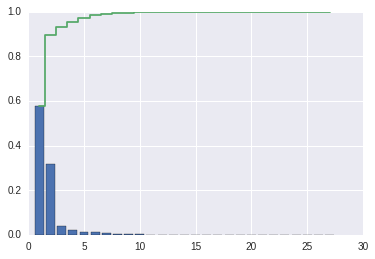

In [36]:
# 성분수 결정 ==> 7개 결정!
pca = PCA().fit(X_allPlayer)

var = pca.explained_variance_
cmap = sns.color_palette()
# plt.figure(figsize=(150, 100))
plt.bar(np.arange(1, len(var)+1), var/np.sum(var), align="center", color=cmap[0])
plt.step(np.arange(1, len(var)+1), np.cumsum(var)/np.sum(var), where="mid", color=cmap[1])

plt.show()

In [37]:
pca = PCA(n_components=7).fit(X_allPlayer)

In [38]:
pca.explained_variance_

array([ 695.99249941,  380.9713845 ,   46.97868776,   27.28975604,
         17.77198578,   15.17746886,    8.23557474])

In [39]:
pca.explained_variance_ratio_

array([ 0.57752377,  0.31612414,  0.03898219,  0.02264462,  0.01474692,
        0.01259403,  0.00683375])

### LCY_COMPARE_WITH

In [40]:
LCY = pd.read_csv("./data/LCY.csv")
LCY_COMPARE_WITH = pd.read_csv("./data/LCY_COMPARE_WITH.csv")

In [41]:
LCY.columns

Index(['Unnamed: 0', 'age', 'asists', 'avgp', 'aw', 'blocks', 'clear',
       'crosses', 'disp', 'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp',
       'league', 'longb', 'mins', 'motm', 'name', 'off', 'offsides', 'owng',
       'position', 'ps_x', 'red', 'spg', 'tackles', 'tall', 'thrb', 'unstch',
       'weight', 'yel'],
      dtype='object')

In [42]:
LCY0 = LCY.drop(['Unnamed: 0', 'league', 'name', 'mins', 'motm', 'position'], axis=1)

In [43]:
len(LCY0.columns)

27

In [44]:
drop_column_list = ['Unnamed: 0', 'flag', 'full_time', 'half_time', 'league', 'mins', 'motm', 'name', 'player_number', 'position', 'ps_y', 'rating', 'team_name', 'labeled_league']

LCY_COMPARE_WITH0 = LCY_COMPARE_WITH.drop(drop_column_list, axis=1)

In [46]:
len(LCY_COMPARE_WITH0.columns)

27

In [47]:
X_LCY = LCY0.get_values()
X_LCY_COMPARE_WITH = LCY_COMPARE_WITH0.get_values()

In [49]:
transformed_LCY = pca.transform(X_LCY)

In [48]:
transformed_LCY_COMPARE_WITH = pca.transform(X_LCY_COMPARE_WITH)

In [50]:
np.abs(transformed_LCY)

array([[  0.51927936,  16.11861541,   0.64944734,   0.59248726,
          0.28154406,   1.79535099,   3.73983964]])

In [51]:
np.abs(transformed_LCY_COMPARE_WITH)

array([[ 14.07420529,  36.32351535,   0.47545725,  35.51264161,
          5.33981807,   2.96216184,   2.75838866],
       [  2.24751351,  33.83841964,   3.8034627 ,  37.79956742,
          1.35178179,   0.04435195,   4.04151301]])

In [52]:
# cosine 유사도 측정
from sklearn.metrics.pairwise import cosine_similarity

In [53]:
cosine_similarity(transformed_LCY_COMPARE_WITH, transformed_LCY)

array([[-0.63746788],
       [-0.59802436]])

### PJH_COMPARE_WITH

In [54]:
PJH = pd.read_csv("./data/PJH.csv")
PJH_COMPARE_WITH = pd.read_csv("./data/PJH_COMPARE_WITH.csv")

In [55]:
PJH0 = PJH.drop(['Unnamed: 0', 'league', 'position', 'team_name'], axis=1)

In [56]:
len(PJH0.columns)

27

In [57]:
drop_column_list = ['Unnamed: 0', 'flag', 'full_time', 'half_time', 'league', 'mins', 'motm', 'name', 'player_number', 'position', 'ps_y', 'rating', 'team_name', 'labeled_league']

PJH_COMPARE_WITH0 = PJH_COMPARE_WITH.drop(drop_column_list, axis=1)

In [58]:
len(PJH_COMPARE_WITH0.columns)

27

In [62]:
X_PJH = PJH0.mean().get_values()
X_PJH_COMPARE_WITH = PJH_COMPARE_WITH0.get_values()

transformed_PJH = pca.transform(X_PJH)
transformed_PJH_COMPARE_WITH = pca.transform(X_PJH_COMPARE_WITH)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [63]:
np.abs(transformed_PJH), np.abs(transformed_PJH_COMPARE_WITH)

(array([[  5.78123037,  19.42957803,   2.26554085,   0.99757888,
           2.88328926,   3.36421384,   2.16806152]]),
 array([[  2.83580987e+00,   1.94586679e+00,   2.60423986e+00,
           2.08802659e+01,   3.19546356e+00,   9.08113832e-01,
           2.69215446e-02],
        [  2.14695262e+00,   9.84624200e+00,   6.50365578e-01,
           2.76559022e+01,   6.21758334e+00,   1.20999868e+00,
           4.66651788e+00]]))

In [64]:
cosine_similarity(transformed_PJH_COMPARE_WITH, transformed_PJH)

array([[-0.08778883],
       [-0.18846374]])

### labeling league

In [ ]:
def labeling_league(x):
    if x == "Bundesliga":
        x = 0
        
    if x == "Ligue1":
        x = 1
        
    if x == "SerieA":
        x = 2
        
    if x == "PremierLeague":
        x = 3
        
    if x == "LaLiga":
        x = 4
        
    if x == "Eredivisie":
        x = 5
        
    return x

In [ ]:
transformed_all_player = pca.transform(X_allPlayer)

In [ ]:
player_df = pd.read_csv("./merged_player.csv", index_col=0)

In [ ]:
player_df['labeled_league'] = player_df['league'].apply(lambda x: labeling_league(x))

In [ ]:
player_df.to_csv('./merged_player.csv')